In [1]:
import numpy as np
#%matplotlib notebook
%matplotlib inline
import matplotlib.pyplot as plt

# Оценка вычислительной погрешности ИКФ
Проверим, как количество узлов влияет на вычислительную погрешность ИКФ с равноотстоящими узлами

In [2]:
# Нахождение весов ИКФ в одну строчку
get_a = lambda xs: np.linalg.solve(np.vander(xs)[:, ::-1].T, 1 / (1. + np.arange(len(xs))))

In [3]:
f1 = np.exp
exact1 = np.exp(1) - 1

f2 = lambda x: x
exact2 = 0.5

Проверяем ИКФ до 40 узлов для `y(x) = e^x` и `y(x) = x`

In [4]:
max_n = 40
ns = np.arange(2, max_n)

sum_abs = [sum(np.abs(get_a(np.linspace(0, 1, n)))) for n in ns]
ys1 = np.array([get_a(np.linspace(0, 1, n)) @ f1(np.linspace(0, 1, n)) for n in ns])
ys2 = np.array([get_a(np.linspace(0, 1, n)) @ f2(np.linspace(0, 1, n)) for n in ns])

Поскольку A_i входят в ИКФ линейно, от суммы их модулей зависит оценка вычислительной погрешности

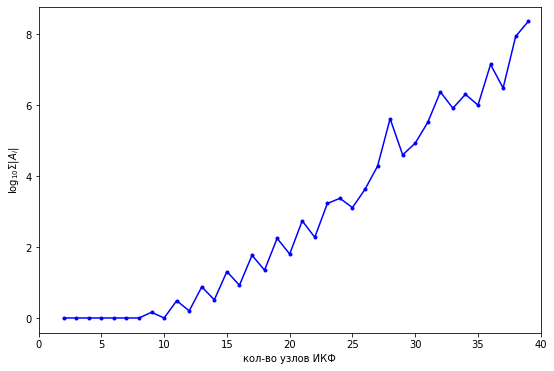

In [5]:
plt.figure(figsize=(9, 6))
plt.plot(ns, np.log10(sum_abs), 'b.-')
plt.xlabel('кол-во узлов ИКФ')
plt.ylabel(r'$\log_{10} \Sigma |A_i|$')
plt.xlim(0, max_n)
pass

Убеждаемся, что после 15 узлов всё ломается (как тольно упёрлись потолок погрешности округления мы тоже упёрлись)

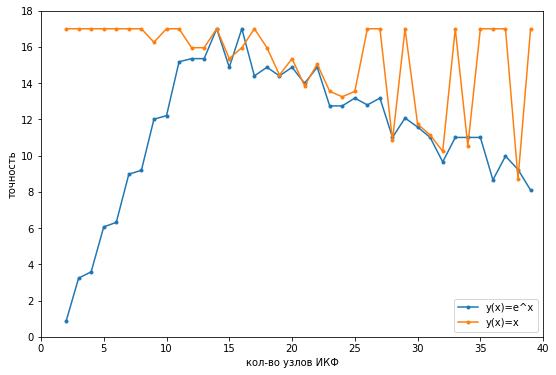

In [6]:
plt.figure(figsize=(9, 6))
plt.plot(ns, -np.log10(np.clip(np.abs(ys1 - exact1), 1e-17, np.inf)), '.-', label=r'y(x)=e^x')
plt.plot(ns, -np.log10(np.clip(np.abs(ys2 - exact2), 1e-17, np.inf)), '.-', label=r'y(x)=x')
plt.xlabel('кол-во узлов ИКФ')
plt.ylabel(r'точность')
plt.axis((0, max_n, 0, 18))
plt.legend()
pass